In [6]:
import numpy as np
import pandas as pd

In [7]:
data=pd.read_csv("loan.csv")

C:\Users\SS33855\AppData\Local\Temp\ipykernel_33448\645508292.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("loan.csv")


In [8]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
data.shape

(39717, 111)

# Data Understanding

-  Provided csv file provides data with respect to various aspects of loan (amount,interest etc.), borrower, repayment history <br>
-  This data allows to analyze various factors that will help to predict loan defaults or successful repayments <br>
-  Bi Variate variables such as 'int_rate', 'dti', 'annual_inc', 'emp_length', and 'home_ownership' can help to bring insights to predict loan defaults or successful repayments <BR>
- There are multiple columns which would have helped to understand CIBIL history but the data for these columns are not present
- There are few like column id, memberid, url, emp_title, zipcode, addr_state which are irrelevant and hence should to be get rid of

# Data Cleaning and Manipulation/Standardization
- Dropping all columns which are having null values
- Dropping all column which are having unique values
- Dropping irrelevant columns "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state" etc

In [10]:
#Dropping all columns which are having null values
data.dropna(axis=1, how='all', inplace=True)

In [11]:
data.shape

(39717, 57)

In [12]:
#Dropping all column which are having unique values
unique_counts = data.nunique()
single_value_columns = unique_counts[unique_counts == 1].index.tolist()

In [13]:
data.drop(columns=single_value_columns, inplace= True)

In [14]:
data.shape

(39717, 48)

In [15]:
# Dropping irrelevant columns
data.drop(columns=["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv", "delinq_2yrs", "revol_bal", "out_prncp",  "total_rec_prncp", "total_rec_int", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record","pub_rec_bankruptcies"], axis = 1, inplace = True)

In [16]:
data.shape

(39717, 26)

In [17]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_late_fee', 'recoveries'],
      dtype='object')

In [18]:
data.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
total_rec_late_fee        0
recoveries                0
dtype: int64

#### There are 2 columns which has mising values : emp_length and revol_util

In [19]:
data.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [22]:
data.emp_length.value_counts()

emp_length
10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [23]:
# As mode value for colun 'emp_length' has far higher occurrence, we can assign mode value to missing values under emp_length column
data['emp_length'].fillna('10+ years', inplace=True)

In [24]:
# As 'revol_util' column has less number of missing values, deleting missing values rows
data=data[~data.revol_util.isnull()]

In [25]:
data.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_late_fee     0
recoveries             0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt          39667 non-null  int64  
 2   funded_amnt_inv      39667 non-null  float64
 3   term                 39667 non-null  object 
 4   int_rate             39667 non-null  object 
 5   installment          39667 non-null  float64
 6   grade                39667 non-null  object 
 7   sub_grade            39667 non-null  object 
 8   emp_length           39667 non-null  object 
 9   home_ownership       39667 non-null  object 
 10  annual_inc           39667 non-null  float64
 11  verification_status  39667 non-null  object 
 12  issue_d              39667 non-null  object 
 13  loan_status          39667 non-null  object 
 14  purpose              39667 non-null  object 
 15  dti                  39667 non-null  floa

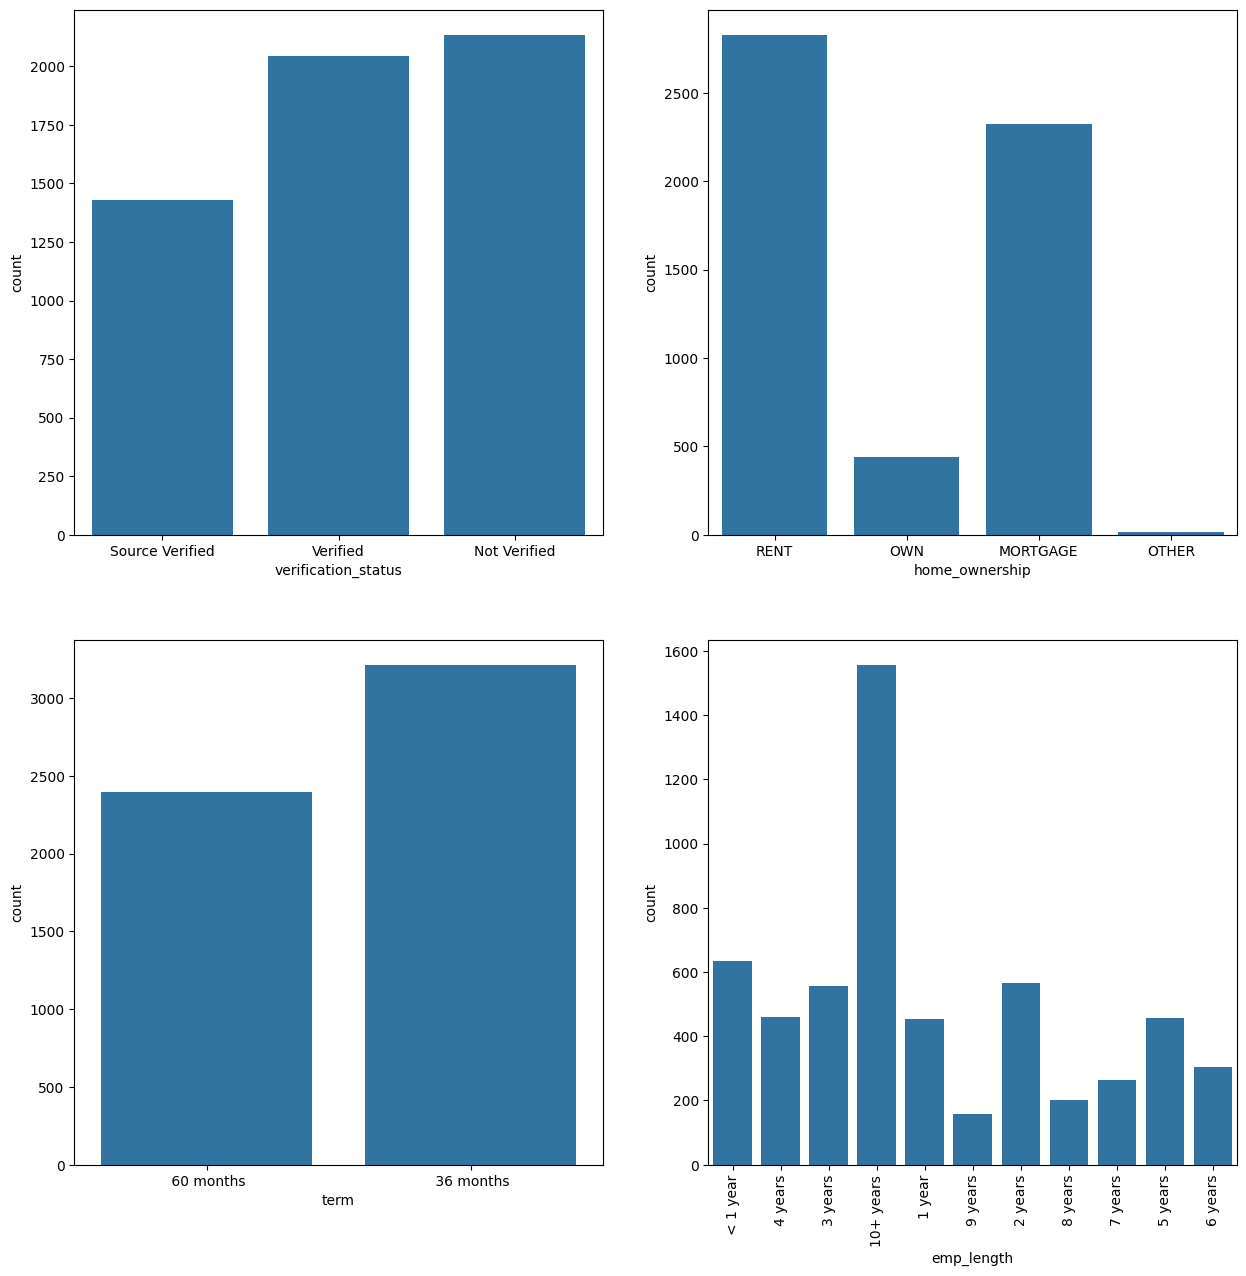

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='home_ownership', data=data[data['loan_status']=='Charged Off'])
plt.subplot(223)
sns.countplot(x='term', data=data[data['loan_status']=='Charged Off'])
plt.subplot(224)
sns.countplot(x='emp_length', data=data[data['loan_status']=='Charged Off'])
plt.xticks(rotation=90)
plt.show()

## Observations
### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

- Applicants having house_ownership as 'RENT'
- Applicants with employement length of 10
- When the loan status is Not verified
- Term of 36 months

{'whiskers': [<matplotlib.lines.Line2D at 0x2009b9e6450>,
 'caps': [<matplotlib.lines.Line2D at 0x2009b9e4510>,
 'boxes': [<matplotlib.lines.Line2D at 0x2009b9e7e50>],
 'medians': [<matplotlib.lines.Line2D at 0x2009b9e8110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2009b9e9c10>],
 'means': []}

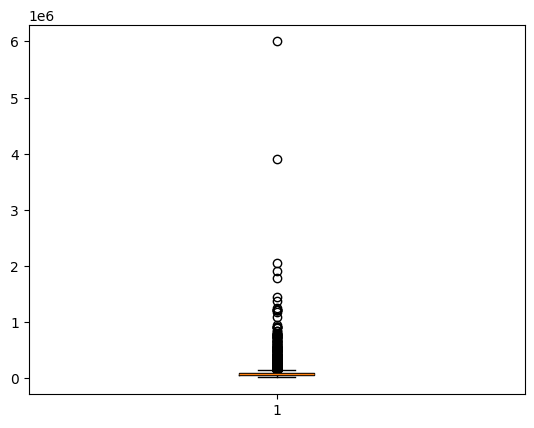

In [43]:
plt.boxplot(data.annual_inc)

#### Verifying outliers for all numeric columns
while doing this, we found only column 'annual_inc' has few outlier as shown below, hence removing them

In [53]:
quantile_info = data.annual_inc.quantile([0.95, 0.97,0.98, 0.994])

In [54]:
quantile_info

0.950    142000.0
0.970    165996.0
0.980    187000.0
0.994    285000.0
Name: annual_inc, dtype: float64

In [55]:
per_99_annual_inc = data['annual_inc'].quantile(0.994)

In [56]:
per_99_annual_inc

np.float64(285000.0)

In [59]:
data = data[data.annual_inc <= per_99_annual_inc]

{'whiskers': [<matplotlib.lines.Line2D at 0x2009a096e50>,
 'caps': [<matplotlib.lines.Line2D at 0x20097535890>,
 'boxes': [<matplotlib.lines.Line2D at 0x2009a0b5ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x2009749e890>],
 'fliers': [<matplotlib.lines.Line2D at 0x2009749f690>],
 'means': []}

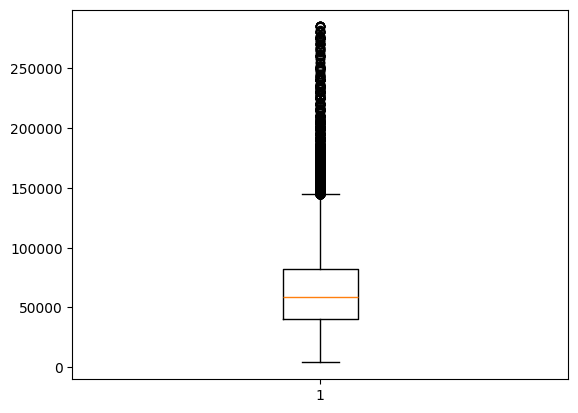

In [60]:
plt.boxplot(data.annual_inc)

In [ ]:
# As we have removed outliers lets

# Now lets check distribution of the Continuous Variable across categories

### 1. loan_amount for each loan_purpose.

C:\Users\SS33855\AppData\Local\Temp\ipykernel_33448\1210463274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='purpose', y='loan_amnt', data=data, palette='Set3')


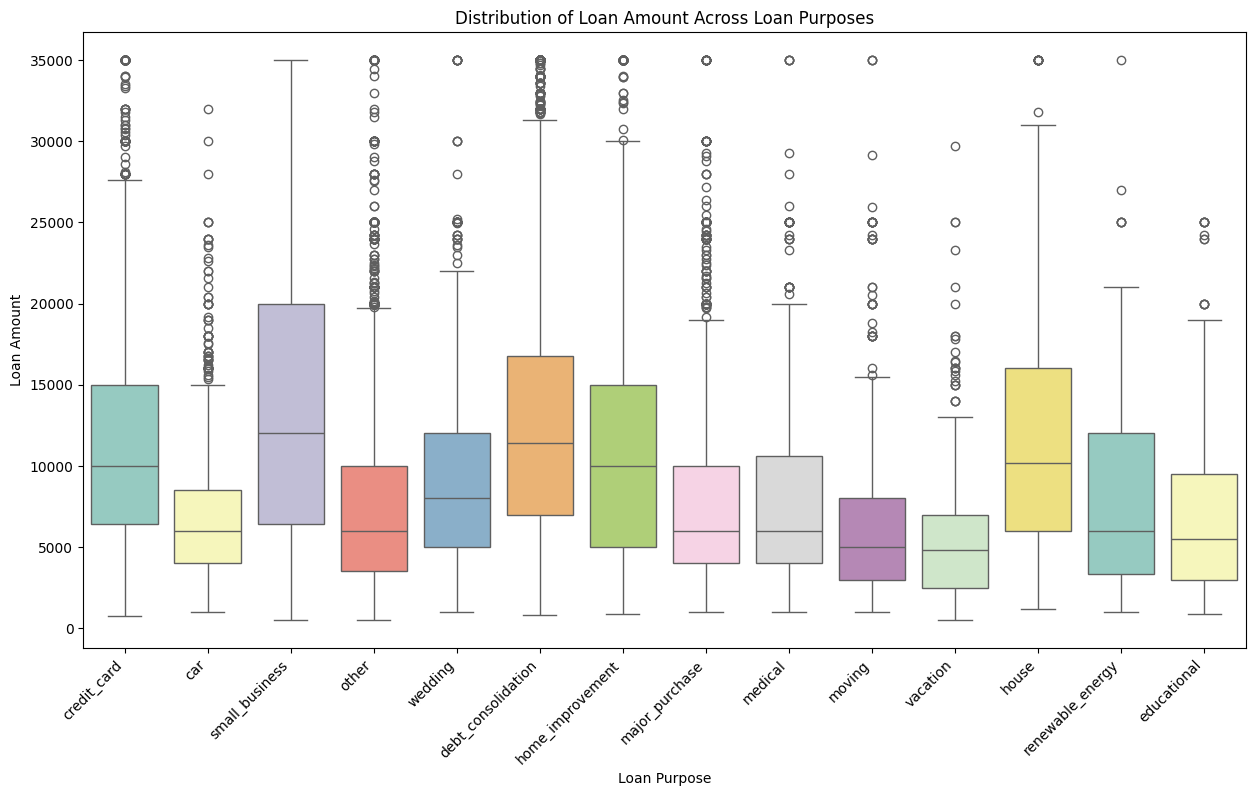

In [64]:

plt.figure(figsize=(15, 8))

# Create a boxplot to show the distribution of loan_amount for each loan_purpose
sns.boxplot(x='purpose', y='loan_amnt', data=data, palette='Set3')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Distribution of Loan Amount Across Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')

# Show the plot
plt.show()

### 2. Annual income vs home ownership

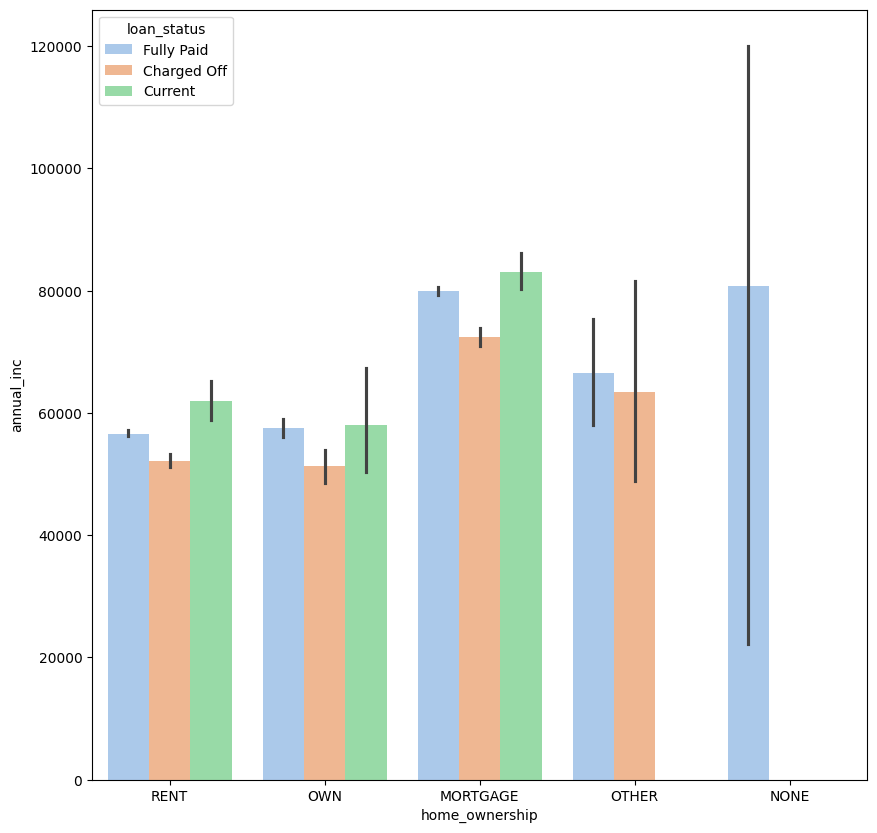

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### 3.grade vs interest rate

In [76]:
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

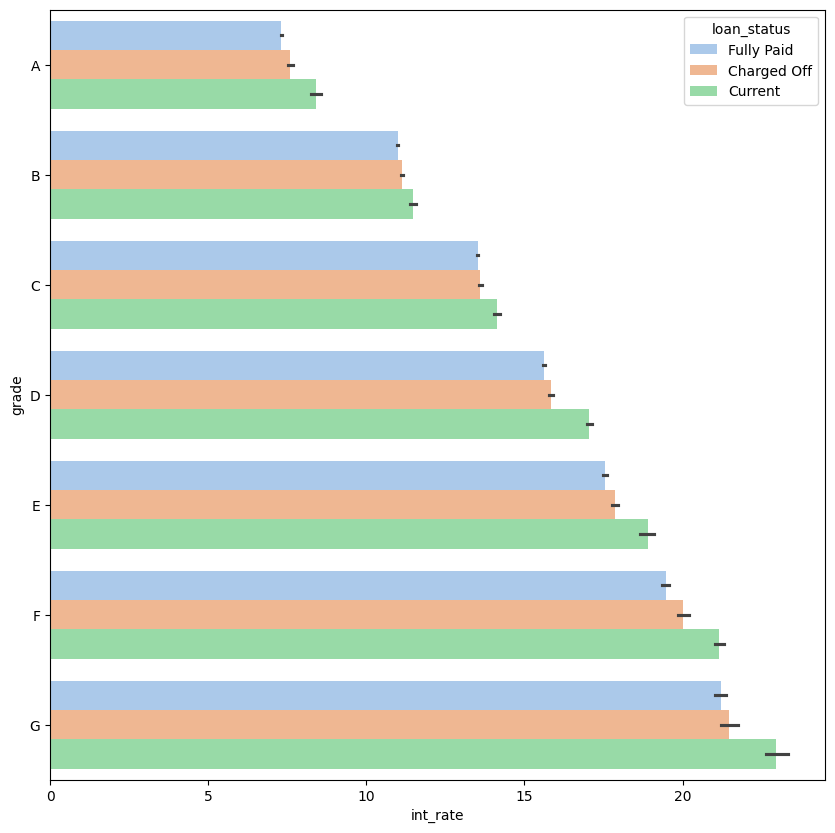

In [77]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

# Observations when did distribution of the Continuous Variable across categories
here is a more probability of defaulting when :

- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants taking loan for 'home improvement' and have income of 60k -70k
- For grade G and interest rate above 20%